#  Movielens Case Study

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [2]:
# Import the three datasets

movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['MovieID' , 'Title' , 'Genres'],encoding='latin-1')
ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['UserID' , 'MovieID' , 'Rating' , 'Timestamp'] )
users = pd.read_csv('users.dat' , delimiter = '::' , names = ['UserID' , 'Gender' , 'Age' ,'Occupation' ,'Zip_code'])

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users.head()

,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# To create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

Master_Data = pd.merge(movies,ratings,on='MovieID').drop('Timestamp', axis=1)
Master_Data = pd.merge(Master_Data, users,on ='UserID').drop('Zip_code', axis=1)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10


In [7]:
# Exploring the datasets using visual representations (graphs or tables):
# (1) User Age Distribution

df=Master_Data['Age'].value_counts(normalize=True)*100
df

25    39.547335
35    19.896142
18    18.349765
45     8.361552
50     7.247485
56     3.877190
1      2.720531
Name: Age, dtype: float64

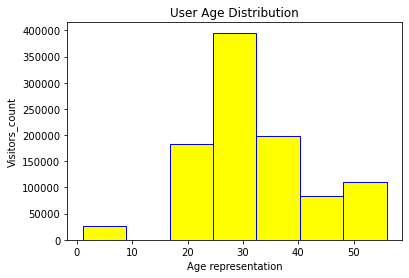

In [8]:
# (1) User Age Distribution - Histogram

plt.hist(Master_Data['Age'],
         facecolor='yellow',
         edgecolor='blue',
         bins=7,
         align ='mid'
        )
plt.title("User Age Distribution")
plt.xlabel("Age representation")
plt.ylabel("Visitors_count")
plt.show()

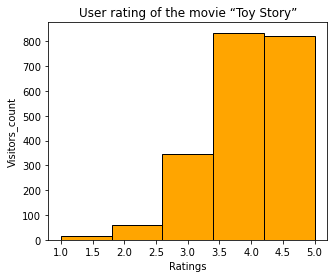

In [9]:
# (2) User rating of the movie “Toy Story”


movies_grouped = Master_Data.groupby('Title')
toy_story = movies_grouped.get_group('Toy Story (1995)')
plt.figure(figsize=(5,4))
plt.hist(toy_story['Rating'],
         facecolor='orange',
         edgecolor='black',
         bins=5
        )
plt.title("User rating of the movie “Toy Story”")
plt.xlabel("Ratings")
plt.ylabel("Visitors_count")
plt.show()

In [10]:
# (3) Top 25 movies by viewership rating

movies_grouped = Master_Data.groupby('Title')
top=movies_grouped['Rating'].mean().sort_values(ascending=False)
top.head(25)


Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [11]:
# (4) Find the ratings for all the movies reviewed by for a particular user of user id = 2696

UserID_grouped = Master_Data.groupby('UserID')
User_2696=UserID_grouped.get_group(2696)
User_2696

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,M,25,7
991036,800,Lone Star (1996),Drama|Mystery,2696,5,M,25,7
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,M,25,7
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,M,25,7
991039,1258,"Shining, The (1980)",Horror,2696,4,M,25,7
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,M,25,7
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,M,25,7
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,M,25,7
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,M,25,7
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,M,25,7


Feature Engineering:

1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [12]:
Unique_genres = set(Master_Data['Genres'])
Unique_list =[]
for i in Unique_genres:
    j=i.split('|')
    Unique_list.extend(j)
Unique_list = set(Unique_list)
print(Unique_list)

{'Thriller', 'Adventure', 'War', 'Film-Noir', 'Romance', 'Drama', 'Documentary', 'Crime', 'Animation', 'Action', 'Fantasy', 'Mystery', "Children's", 'Horror', 'Musical', 'Comedy', 'Sci-Fi', 'Western'}


2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [13]:
for i in Unique_list:
    Master_Data[i]=Master_Data['Genres'].apply(lambda x: 1 if i in x else 0)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Thriller,Adventure,...,Animation,Action,Fantasy,Mystery,Children's,Horror,Musical,Comedy,Sci-Fi,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0,0,...,1,0,0,0,1,0,0,1,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,0,0,...,1,0,0,0,1,0,1,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,0,1,...,0,1,1,0,0,0,0,0,1,0
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0


3. Determine the features affecting the ratings of any particular movie.


In [14]:
Master_Data.corr()[['Rating']]

,Rating
MovieID,-0.064042
UserID,0.012303
Rating,1.000000
Age,0.056869
Occupation,0.006753
Thriller,-0.004806
Adventure,-0.036718
War,0.075688
Film-Noir,0.060259
Romance,0.009644


4. Develop an appropriate model to predict the movie ratings

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
x=Master_Data[['Adventure', "Children's", 'Documentary', 'Sci-Fi', 'Comedy', 'Animation', 'Romance', 'Drama', 'Musical', 'Western', 'Action', 'Horror', 'War', 'Mystery', 'Film-Noir', 'Fantasy', 'Crime', 'Thriller']]
y=Master_Data['Rating']

In [17]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2, random_state=42)

In [18]:
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
model.predict(x_test)

array([3.68624785, 3.55902551, 3.15331904, ..., 3.4854816 , 3.50127375,
       3.9293548 ])